# Using Python for STATS

See [blog post here (draft in gdoc)](https://docs.google.com/document/d/16WJnYeezBevUBvsYpbklW04ukvrtG_8QVdfsbd15pqg/edit).Feel free to leave comments, suggest-edits, or make edits directly in the gdoc.

In [1]:
# Figures setup
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    style="whitegrid",
    rc={'figure.figsize': (6.25, 2.0)},
)
# High-resolution figures please
%config InlineBackend.figure_format = 'retina'

<Figure size 640x480 with 0 Axes>

## What can python do for you?

### Python as a calculator

In [2]:
2.1 + 3.4

5.5

In [3]:
num1 = 2.1
num2 = 3.4
num1 + num2

5.5

In [4]:
(num1 + num2) / 2

2.75

### Powerful primitives and built-ins

In [5]:
grades = [80, 90, 70, 60]
avg = sum(grades) / len(grades)
avg

75.0

### For loops

In [6]:
total = 0
for grade in grades:
    total = total + grade
avg = total / len(grades)
avg

75.0

### Math functions and Python functions

In math, 
a function is a mapping from input values (usually denoted x) to output values (usually denoted y).

Consider the mapping that doubles the input and adds five to it,
which we can express as the math function $f(x) = 2x+5$.
For any input $x$,
the output of the function $f$ is denoted $f(x)$ and is equal to $2x+5$.
For example, $f(3)$ describes the output of the function when the input is $x=3$,
and it is equal to $2(3)+5 = 6 + 5 = 11$.

The Python equivalent of the math function $f(x) = 2x+5$ is shown below. 



In [7]:
def f(x):
    y = 2*x + 5
    return y

To **define** the Python function called `f`,
we use the `def` keyword,
then write all the function calculations in an indented block
that ends with a `return` statement for the output of the function.

To **call** the function `f` with input `x`, we simply writhe `f(x)` in Python,
which is the same as the math notation we use for "evaluate the function at the value x."

In [8]:
f(3)

11

The mean is defined as $\mathbf{Mean}(\mathbf{x}) = \frac{1}{n}  \sum_{i=1}^{i=n} x_i$,
where $\mathbf{x} = [x_1, x_2, x_3, \ldots, x_n]$ is a list of values.

In [9]:
def mean(sample):
    total = 0
    for xi in sample:
        total = total + xi
    avg = total / len(sample)
    return avg

In [10]:
mean(grades)

75.0

## Why do you need coding for statistics?

### Descriptive statistics

#### Data visualization

In [11]:
pricesW = [11.8, 10, 11, 8.6, 8.3, 9.4, 8, 6.8, 8.5]

In [12]:
len(pricesW)

9

In [13]:
mean(pricesW)

9.155555555555555

<AxesSubplot: >

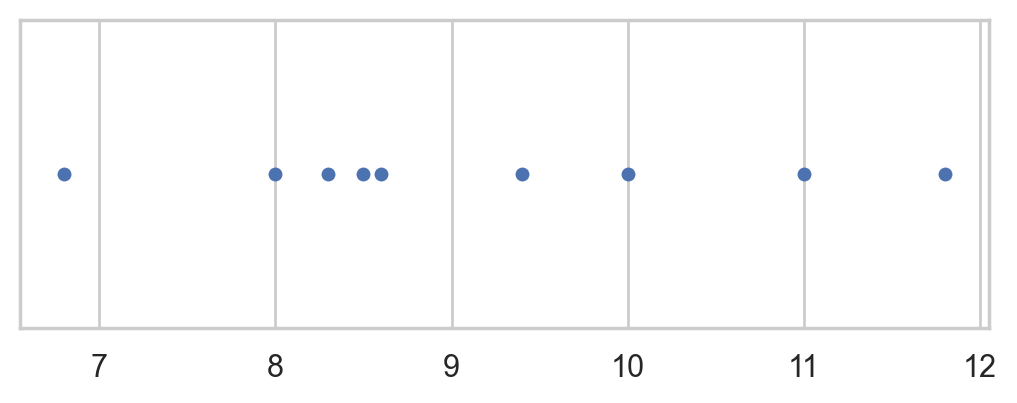

In [14]:
import seaborn as sns
sns.stripplot(x=pricesW, jitter=0)

<AxesSubplot: ylabel='Count'>

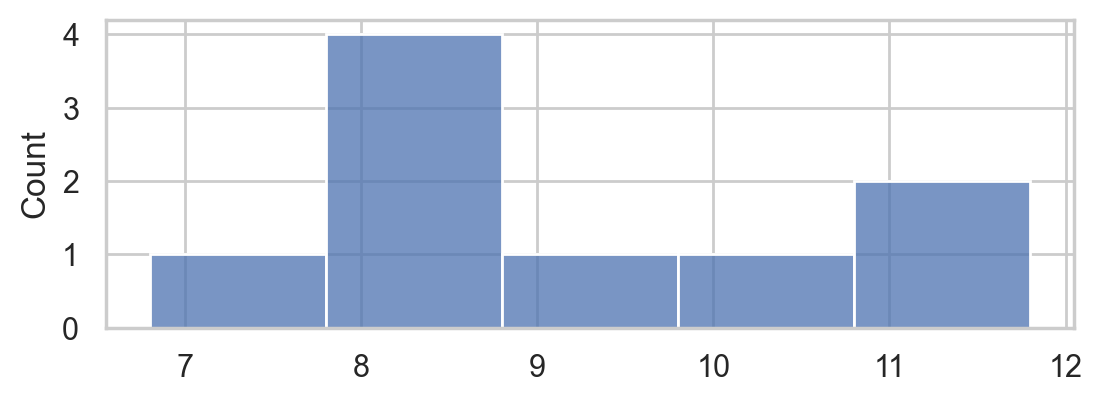

In [15]:
sns.histplot(x=pricesW)

<AxesSubplot: >

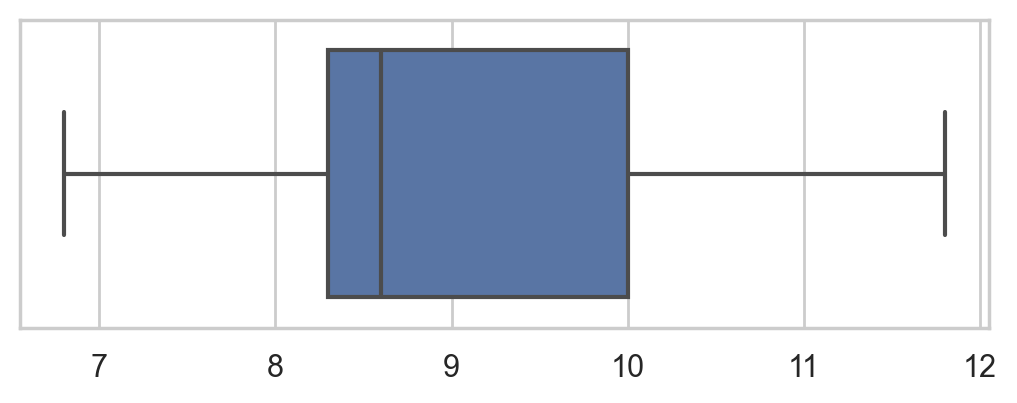

In [16]:
sns.boxplot(x=pricesW)

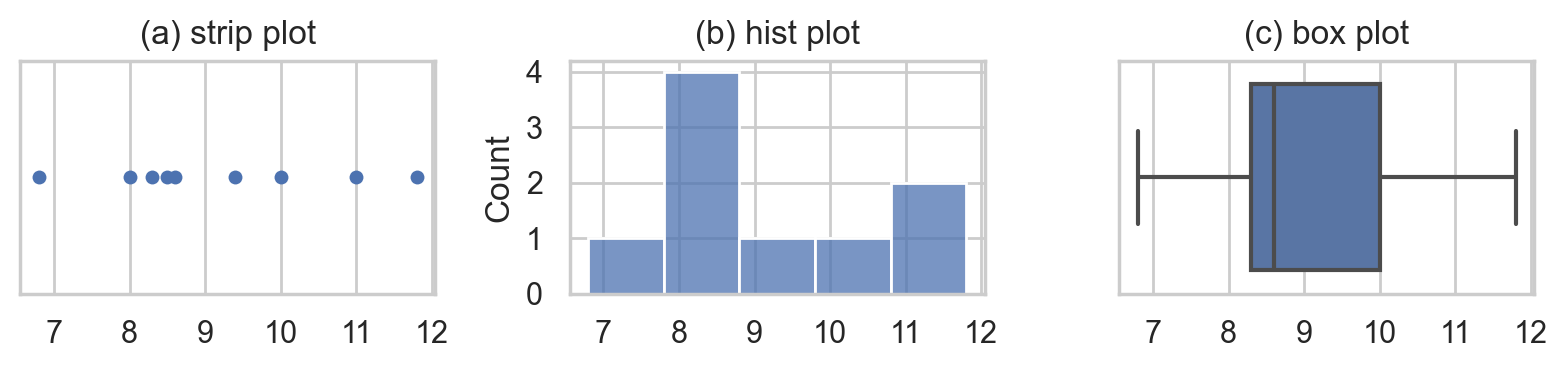

In [17]:
# FIGURES
import matplotlib.pyplot as plt
import seaborn as sns
with plt.rc_context({"figure.figsize":(8,2)}):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)

    ax1.set_title("(a) strip plot")
    sns.stripplot(x=pricesW, ax=ax1, jitter=0)
    ax1.set_xticks(range(7,13))

    ax2.set_title("(b) hist plot")
    sns.histplot(x=pricesW, ax=ax2)
    ax2.set_xticks(range(7,13))
    ax2.set_yticks(range(0,5))

    ax3.set_title("(c) box plot")
    sns.boxplot(x=pricesW, ax=ax3)
    ax3.set_xticks(range(7,13))

filename = "figures/epricesW_strip_hist_box_plots.png"
fig.tight_layout()
fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

#### Numerical summaries

In [18]:
DATA_URL = "https://raw.githubusercontent.com/minireference/noBSstatsnotebooks/main/datasets/epriceswide.csv"

import pandas as pd
epriceswide = pd.read_csv(DATA_URL)
epriceswide

,East,West
0,7.7,11.8
1,5.9,10.0
2,7.0,11.0
3,4.8,8.6
4,6.3,8.3
5,6.3,9.4
6,5.5,8.0
7,5.4,6.8
8,6.5,8.5


In [19]:
pricesW = epriceswide["West"]
pricesE = epriceswide["East"]

In [20]:
# # ALT. we can input data by specifying lists of values
# pricesW = pd.Series([11.8,10,11,8.6,8.3,9.4,8,6.8,8.5])
# pricesE = pd.Series([7.7,5.9,7,4.8,6.3,6.3,5.5,5.4,6.5])

In [21]:
pricesW.mean()

9.155555555555557

In [22]:
pricesW.describe()

count     9.000000
mean      9.155556
std       1.562139
min       6.800000
25%       8.300000
50%       8.600000
75%      10.000000
max      11.800000
Name: West, dtype: float64

### Understanding probability distributions

#### Building computer models for probability distributions

The standard normal distribution $Z \sim \mathcal{N}(\mu=0,\sigma=1)$ has the probability density function:

$$
    f_Z(z) = \tfrac{1}{\sqrt{2\pi}} e^{ - \frac{1}{2}z^2}.
$$

The standard normal is a special case of the general normal $\mathcal{N}(\mu, \sigma)$
where $\mu$ is the mean and $\sigma$ is the standard deviation.


In [23]:
import numpy as np

def fZ(z):
    const = 1 / np.sqrt(2*np.pi)
    exp = np.exp(-1/2 * z**2)
    return const*exp

In [24]:
fZ(1)

0.24197072451914337

#### Predefined computer models

We create a computer model for the general normal distribution 
$\mathcal{N}(\mu, \sigma)$ by calling `norm(mu,sigma)`,
where `norm` is `scipy.stats.norm`.

In [25]:
from scipy.stats import norm

rvZ = norm(0,1)
rvZ

In [26]:
rvZ.pdf(1)

0.24197072451914337

#### Probability model visualizations

<AxesSubplot: >

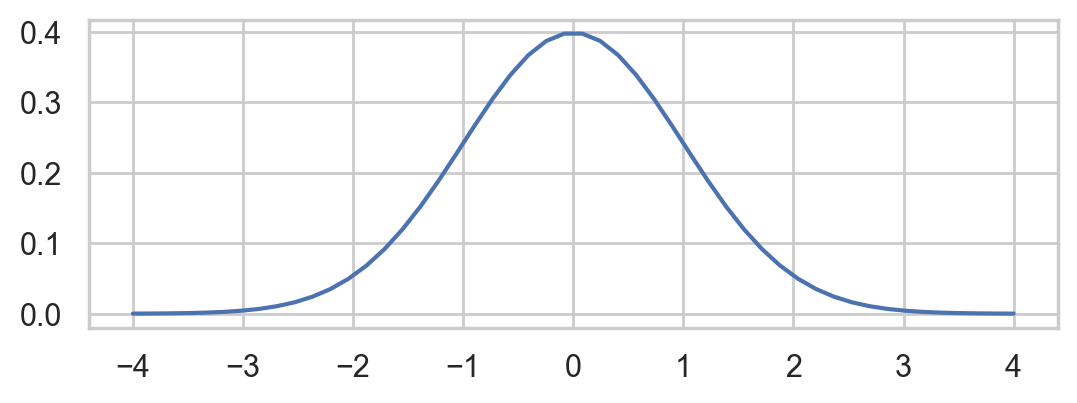

In [27]:
zs = np.linspace(-4, 4)
fZs = rvZ.pdf(zs)
sns.lineplot(x=zs, y=fZs)

### Doing probability calculations

Calculating probabilities with the continuous random variable $Z$ requires continuous need integral

In [28]:
from scipy.integrate import quad
quad(rvZ.pdf, 2, np.inf)[0]

0.02275013194817598

In [29]:
rvZ.cdf(2)

0.9772498680518208

In [30]:
1 - rvZ.cdf(2)

0.02275013194817921

#### Discrete random variable calculations

Poisson random variable $H$

To see a complete worked example based on the 
see [Example 3: hard disk failures](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=15) and
[Section 2.1.5 Hard disks example](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=29) in the PDF preview of Chapter 2.

### Running statistical simulations

#### Sampling distributions

Simulate 10000 amples of size 20 from the standard normal random variable $Z \sim \mathcal{N}(0,1)$
to generate the sampling distribution of the mean.

In [31]:
xbars = []
for i in range(0, 10000):
    sample = rvZ.rvs(20)
    xbar = mean(sample)
    xbars.append(xbar)

xbars[0:5]

[-0.04615512729345514,
 -0.16969498785088205,
 0.027593815341524598,
 0.326475804656304,
 -0.29350437312572086]

<AxesSubplot: ylabel='Count'>

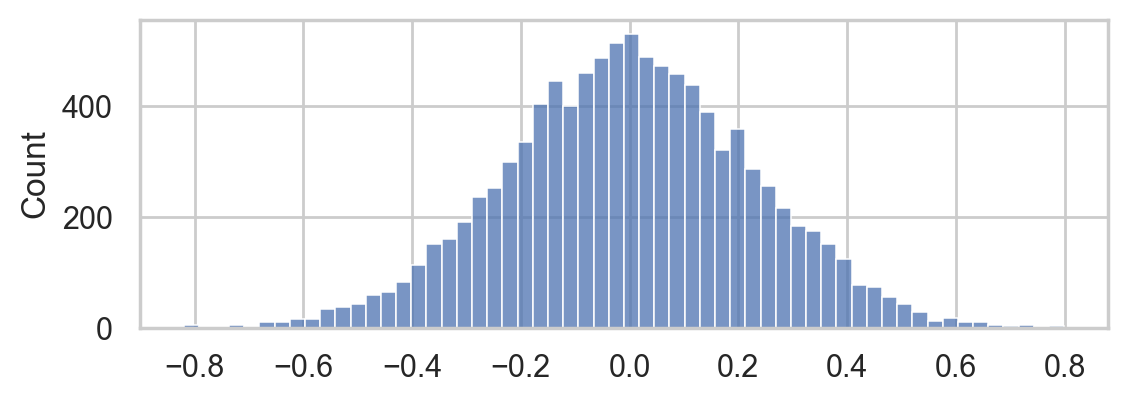

In [32]:
sns.histplot(xbars)

#### Verifying p-values

In [33]:
from scipy.stats import norm, ttest_1samp

muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

count = 0
for j in range(0, 10000):
    sample = rvK.rvs(20)
    res = ttest_1samp(sample, popmean=muK)
    if res.pvalue < 0.05:
        count = count + 1

count / 10000

0.0521

<AxesSubplot: ylabel='Count'>

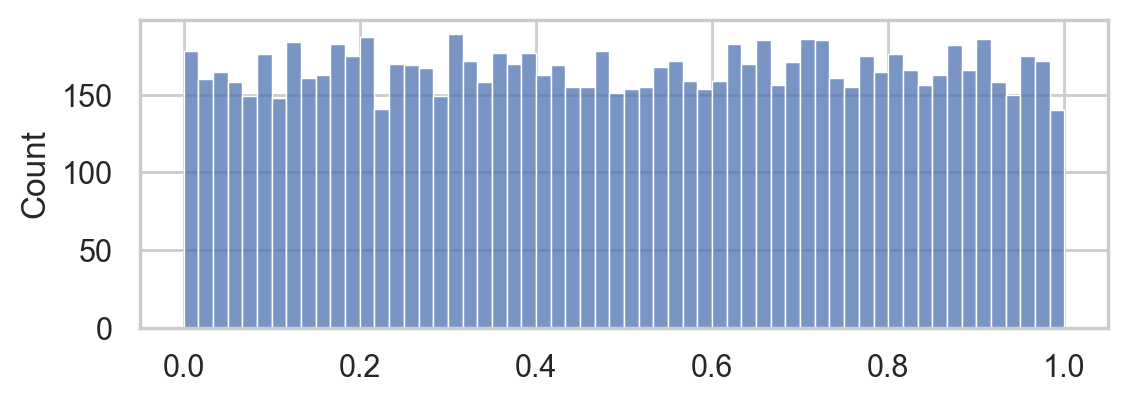

In [53]:
from scipy.stats import norm, ttest_1samp

muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

pvals = []
for j in range(0, 10000):
    sample = rvK.rvs(20)
    res = ttest_1samp(sample, popmean=muK, alternative="greater")
    pvals.append(res.pvalue)

sns.histplot(pvals, bins=60)

### Verifying confidence intervals

In [34]:
import numpy as np
np.random.seed(10)

muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

count = 0
for j in range(0, 10000):
    sample = rvK.rvs(20)
    res = ttest_1samp(sample, popmean=1000)
    ci = res.confidence_interval(confidence_level=0.90)
    if ci.low <= muK <= ci.high:
        count = count + 1

count / 10000

0.9049

### Resampling methods

#### Bootstrap estimation

Generate 5000 bootstrap samples (sampling with replacement) from the sample `pricesW`.
Use the bootstrap samples to approximate the sampling distribution of the mean.

<AxesSubplot: ylabel='Count'>

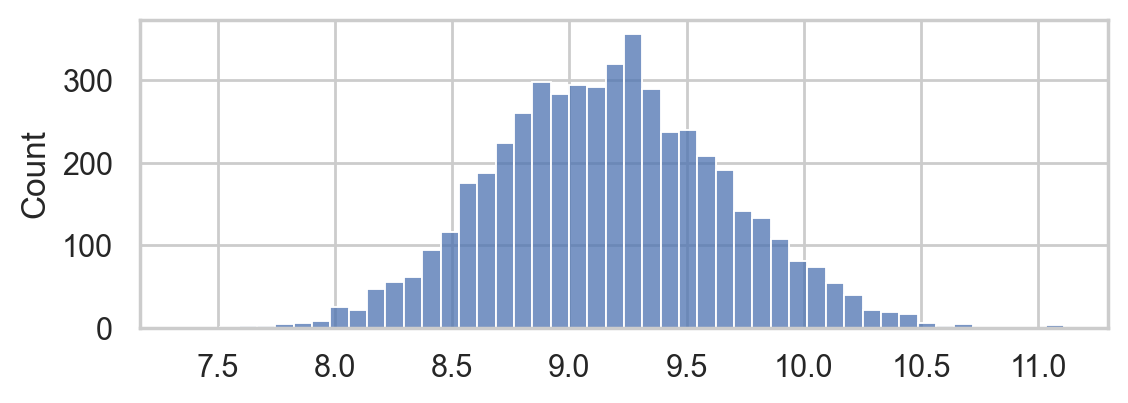

In [76]:
n = len(pricesW)
xbars_boot = []
for i in range(0, 5000):
    bsample = np.random.choice(pricesW, n, replace=True)
    xbar_boot = mean(bsample)
    xbars_boot.append(xbar_boot)

sns.histplot(xbars_boot)

#### Permutation test

In [55]:
# TODO: simplify

def dmeans(xsample, ysample):
    dhat = mean(xsample) - mean(ysample)
    return dhat

# Calculate the observed difference between means
dprice = dmeans(pricesW, pricesE)
dprice

3.0

Obtain sampling distribution of the difference between means under the null hypothesis.

In [74]:
np.random.seed(42)

pdhats = []
for i in range(0, 10000):
    prices = np.concatenate((pricesW, pricesE))
    shuffled_prices = np.random.permutation(prices)
    psampleW = shuffled_prices[0:len(pricesW)]
    psampleE = shuffled_prices[len(pricesW):]
    pdhat = dmeans(psampleW, psampleE)
    pdhats.append(pdhat)

Compute the p-value of the observed difference between means `dprice` under the null hypothesis.

In [78]:
tails = [d for d in pdhats if abs(d) > dprice]
pvalue = len(tails) / len(pdhats)
pvalue

0.0002

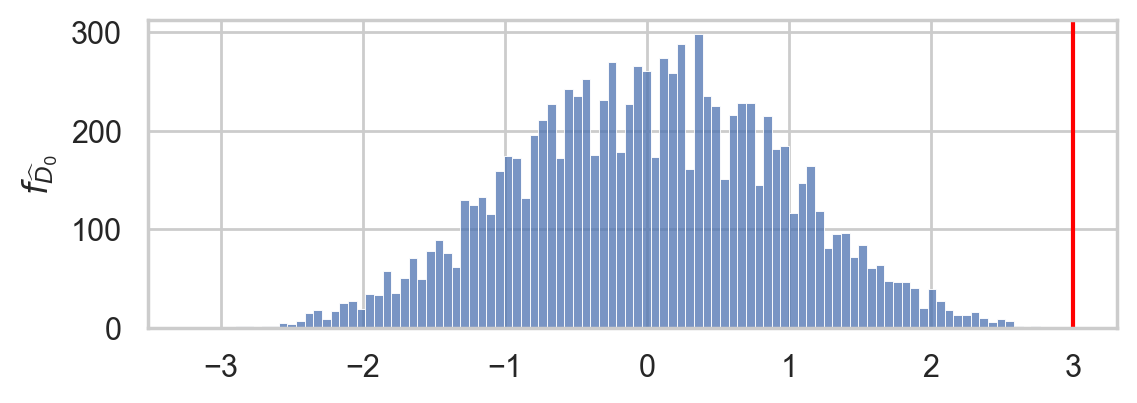

In [83]:
# plot the sampling distribution in blue
ax = sns.histplot(pdhats, bins=100)

# plot red line for the observed statistic
plt.axvline(dprice, color="red")

# plot the values that are equal or more extreme in red
sns.histplot(tails, ax=ax, bins=100, color="red")
_ = ax.set_ylabel("$f_{\widehat{D}_0}$")

### Data cleaning

In [38]:
import pandas as pd

DATA_URL = "https://raw.githubusercontent.com/minireference/noBSstatsnotebooks/main/datasets/epriceswide.csv"
epriceswide = pd.read_csv(DATA_URL)
epriceswide

,East,West
0,7.7,11.8
1,5.9,10.0
2,7.0,11.0
3,4.8,8.6
4,6.3,8.3
5,6.3,9.4
6,5.5,8.0
7,5.4,6.8
8,6.5,8.5


click [here](https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0A%0Aepriceswide_csv%20%3D%20'''%0AEast,West%0A7.7,11.8%0A5.9,10.0%0A7.0,11.0%0A4.8,8.6%0A6.3,8.3%0A6.3,9.4%0A5.5,8.0%0A5.4,6.8%0A6.5,8.5%0A'''%0A%0Aepriceswide%20%3D%20pd.read_csv%28io.StringIO%28epriceswide_csv%29%29%0A%0Aepriceswide.melt%28var_name%3D%22end%22,%20value_name%3D%22price%22%29&d=2023-07-02&lang=py&v=v1) to see a visualization of the melt operation.

In [39]:
eprices = pd.melt(epriceswide, var_name="end", value_name='price')
eprices

,end,price
0,East,7.7
1,East,5.9
2,East,7.0
3,East,4.8
4,East,6.3
5,East,6.3
6,East,5.5
7,East,5.4
8,East,6.5
9,West,11.8


In [40]:
pricesW = eprices[eprices["end"]=="West"]["price"]
pricesE = eprices[eprices["end"]=="East"]["price"]

pricesW.values, pricesE.values

(array([11.8, 10. , 11. ,  8.6,  8.3,  9.4,  8. ,  6.8,  8.5]),
 array([7.7, 5.9, 7. , 4.8, 6.3, 6.3, 5.5, 5.4, 6.5]))

### Statistics procedures as code

In [41]:
def gen_sampling_dist(rv, estfunc, n, N=10000):
    """
    Simulate `N` samples of size `n` from the random variable `rv` to
    generate the sampling distribution of the estimator `estfunc`.
    """
    estimates = []
    for i in range(0, N):
        sample = rv.rvs(n)
        estimate = estfunc(sample)
        estimates.append(estimate)
    return estimates

In [42]:
def gen_boot_dist(sample, estfunc, B=5000):
    """
    Generate estimates from the sampling distribution of the estimator `estfunc`
    based on `B` bootstrap samples (sampling with replacement) from `sample`.
    """
    n = len(sample)
    bestimates = []
    for i in range(0, B):
        bsample = np.random.choice(sample, n, replace=True)
        bestimate = estfunc(bsample)
        bestimates.append(bestimate)
    return bestimates

In [43]:
def permutation_test(xsample, ysample, estfunc, P=10000):
    """
    Compute the p-value of the observed estimate `estfunc(xsample,ysample)`
    under the null hypothesis where the group membership is randomized.
    """
    # 1. Compute the observed value of `estfunc`
    obsest = estfunc(xsample, ysample)

    # 2. Get sampling dist. of `estfunc` under H0
    pestimates = []
    for i in range(0, P):
        rsx, rsy = resample_under_H0(xsample, ysample)
        pestimate = estfunc(rsx, rsy)
        pestimates.append(pestimate)

    # 3. Compute the p-value
    tails = tailvalues(pestimates, obsest)
    pvalue = len(tails) / len(pestimates)
    return pvalue

## How much Python do you need?

## Conclusion

_____

# CUT MATERIAL

#### Pandas equivalent

In [44]:
import pandas as pd
gseries = pd.Series(grades)
gseries.mean()

75.0

$N \sim \mathcal{N}(\mu,\sigma)$ has the probability density function:

$$
    f_N(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 },
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.
We use the notation $\mathcal{N}(\mu, \sigma)$ to describe the distribution as math,
and `norm(mu,sigma)` to describe as computer model.

In [45]:
import numpy as np

def fN(x, mu=0, sigma=1):
    const = 1 / (sigma*np.sqrt(2*np.pi))
    exp = np.exp( -1/2 * ( (x-mu)/sigma )**2 )
    return const * exp

In [46]:
fN(3, 2, 3)

0.12579440923099774